## Import Package

In [100]:
# Package to load
import numpy as np # linear algebra
import pandas as pd # Digunakan untuk manipulasi, analisis, dan pengelolaan data dalam bentuk tabel (dataframe) secara efisien.
import matplotlib.pyplot as plt # igunakan untuk membuat visualisasi data seperti grafik, diagram, dan plot lainnya.
import seaborn as sns


#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# stats tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import itertools
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import acorr_ljungbox


import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

## Import Dataset Harga Saham BNI

In [101]:
df = pd.read_csv("D:\KULIAH S2 IPB\SEMESTER 2\ANALISIS DERET WAKTU (ADW)\KULIAH\Tugas1_Kelompok\BBNI.JK.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,8975.0,9000.0,8825.0,8900.0,8900.0,14174700
1,2022-10-04,8925.0,9000.0,8850.0,8850.0,8850.0,29190100
2,2022-10-05,8900.0,8975.0,8850.0,8850.0,8850.0,32491500
3,2022-10-06,8900.0,8950.0,8800.0,8900.0,8900.0,11984500
4,2022-10-07,8850.0,8875.0,8750.0,8775.0,8775.0,18278000


### **Istilah dalam Analisis Harga Saham**

Beberapa istilah penting terkait harga saham:

- **Terbuka (Open)** → Harga awal suatu saham saat mulai diperdagangkan setelah bel pembukaan berbunyi.  
- **Tutup (Close)** → Harga terakhir yang tercatat ketika bursa saham ditutup untuk hari itu, mencerminkan transaksi beli dan jual terakhir yang terjadi.  
- **Tinggi (High)** → Harga tertinggi yang dicapai suatu saham selama periode perdagangan tertentu.  
- **Rendah (Low)** → Harga terendah yang dicapai suatu saham dalam periode tersebut.  
- **Adj Close (Adjusted Close / Harga Penutupan Disesuaikan)** → Harga penutupan yang telah disesuaikan untuk faktor-faktor seperti pembagian dividen, stock split, atau aksi korporasi lainnya, sehingga lebih akurat dalam analisis historis. Harga penutupan yang disesuaikan (Adj Close) lebih sering digunakan dalam analisis investasi karena mencerminkan perubahan nilai saham secara lebih akurat dibandingkan harga penutupan biasa.
- **Volume** → Jumlah total saham yang diperdagangkan dalam periode tertentu, yang mencerminkan likuiditas saham tersebut.  

### **Mengapa Harga Penutupan Saham Penting?**  

1. **Indikator Kinerja Saham**  
   Harga penutupan mencerminkan bagaimana kinerja suatu saham dalam satu hari perdagangan. Investor sering menggunakannya untuk mengevaluasi pergerakan saham dari waktu ke waktu.  

2. **Dasar Perhitungan Return Saham**  
   Return atau keuntungan saham dihitung berdasarkan selisih harga penutupan dari hari ke hari. Selisih ini membantu investor menentukan apakah saham tersebut mengalami kenaikan atau penurunan nilai.  

3. **Analisis Historis & Tren Pasar**  
   Harga penutupan digunakan dalam analisis teknikal dan fundamental untuk mengidentifikasi pola pergerakan harga saham dan tren pasar dalam jangka pendek maupun panjang.  

4. **Tolok Ukur untuk Perbandingan**  
   Banyak indeks pasar saham, seperti S&P 500 atau IHSG, menggunakan harga penutupan untuk menghitung nilai indeks, sehingga mempermudah investor dalam membandingkan kinerja berbagai saham.  

5. **Pengaruh terhadap Keputusan Investasi**  
   Investor dan trader sering kali menggunakan harga penutupan untuk membuat keputusan perdagangan di hari berikutnya, terutama jika ada perubahan signifikan dalam harga saham.  

6. **Dasar Penyesuaian Harga (Adj Close)**  
   Harga penutupan yang disesuaikan (Adjusted Close) mempertimbangkan aksi korporasi seperti dividen dan stock split, sehingga memberikan gambaran lebih akurat tentang nilai sebenarnya suatu saham dari waktu ke waktu.  

Karena perannya yang sangat penting dalam analisis keuangan, harga penutupan sering menjadi acuan utama bagi investor, analis, dan lembaga keuangan dalam menilai performa suatu saham.

In [102]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [104]:
# Mengubah type data menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,8975.0,9000.0,8825.0,8900.0,8900.0,14174700
1,2022-10-04,8925.0,9000.0,8850.0,8850.0,8850.0,29190100
2,2022-10-05,8900.0,8975.0,8850.0,8850.0,8850.0,32491500
3,2022-10-06,8900.0,8950.0,8800.0,8900.0,8900.0,11984500
4,2022-10-07,8850.0,8875.0,8750.0,8775.0,8775.0,18278000


In [105]:
df.shape

(59, 7)

In [106]:
# Mengatur kolom 'Date' sebagai index dan mengurutkannya
df = df.set_index('Date').sort_index()

# Menampilkan 5 sampel acak dari DataFrame
df_sample = df.sample(5)
print(df_sample)

              Open    High     Low   Close  Adj Close    Volume
Date                                                           
2022-10-10  8700.0  8775.0  8650.0  8750.0     8750.0  16389000
2022-10-04  8925.0  9000.0  8850.0  8850.0     8850.0  29190100
2022-12-14  9675.0  9750.0  9475.0  9525.0     9525.0  25656700
2022-10-11  8750.0  8750.0  8600.0  8700.0     8700.0  28479500
2022-12-06  9700.0  9700.0  9500.0  9550.0     9550.0  40480300


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2022-10-03 to 2022-12-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       59 non-null     float64
 1   High       59 non-null     float64
 2   Low        59 non-null     float64
 3   Close      59 non-null     float64
 4   Adj Close  59 non-null     float64
 5   Volume     59 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.2 KB
None


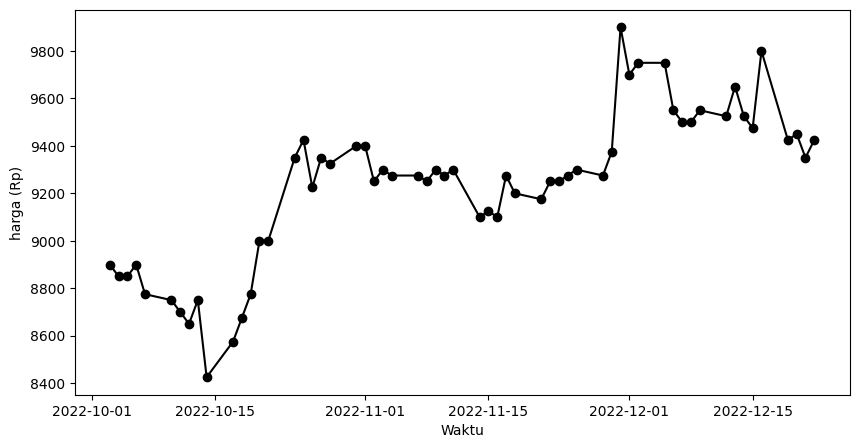

In [107]:
# Tampilkan informasi dataset
print("Informasi dataset:")
print(df.info())


#menampilkan plot deret waktu
plt.figure(figsize=(10,5))
plt.plot(df.index, df.Close,'-ok')
plt.xlabel('Waktu'), plt.ylabel('harga (Rp)')
plt.show()

Pola tersebut tidak stasioner dalam rataan karena pola tersebut tampak konstan atau tidak ada pola kecenderungan konstan karena ada kecenderungan naik/turun tapi dalam hal ini kecenderungan naik. Namun masih bisa tampak stasioner dalam ragam karena lebar atau jarak antar titik masih banyak yang berdekatan dan berulang.
1. Pergerakan Harga:
- Grafik menunjukkan perubahan harga dalam satuan Rupiah (Rp) terhadap waktu.
- Pada awal periode (sekitar Oktober 2022), harga mengalami penurunan signifikan hingga mencapai titik terendah sekitar pertengahan Oktober 2022.
- Setelah itu, harga mengalami tren kenaikan yang cukup tajam hingga awal November 2022.
2. Fluktuasi Harga:
- Setelah mencapai puncak pada November 2022, harga relatif stabil tetapi masih menunjukkan sedikit fluktuasi hingga awal Desember.
- Pada Desember 2022, terdapat kenaikan tajam yang diikuti penurunan.
3. Titik Penting:
- Titik terendah: Pertengahan Oktober 2022 dengan harga sekitar Rp 8400.
- Titik tertinggi: Awal Desember 2022 dengan harga mendekati Rp 9800.
4. Polanya:
- Secara umum, pergerakan harga menunjukkan siklus naik-turun yang mungkin dipengaruhi oleh faktor musiman, ekonomi, atau lainnya

<Axes: xlabel='Date'>

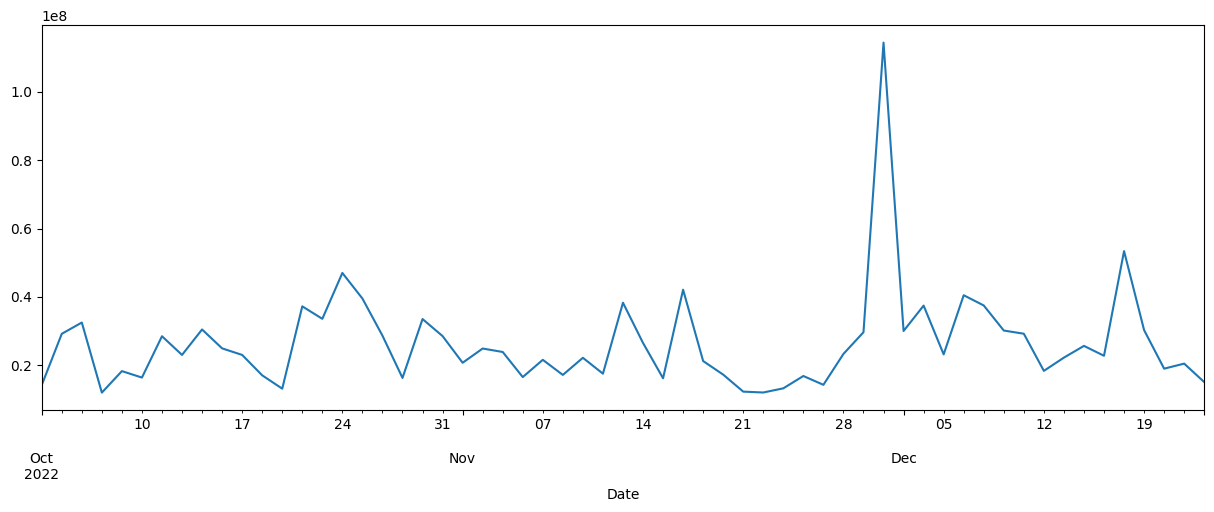

In [108]:
df['Volume'].plot(figsize=(15,5))

In [109]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
              Open         High          Low        Close    Adj Close   
count    59.000000    59.000000    59.000000    59.000000    59.000000  \
mean   9238.983051  9333.898305  9128.813559  9233.898305  9233.898305   
std     327.716472   323.429985   310.096396   325.919214   325.919214   
min    8425.000000  8625.000000  8350.000000  8425.000000  8425.000000   
25%    9012.500000  9150.000000  8925.000000  9050.000000  9050.000000   
50%    9275.000000  9350.000000  9225.000000  9275.000000  9275.000000   
75%    9475.000000  9537.500000  9350.000000  9425.000000  9425.000000   
max    9900.000000  9950.000000  9675.000000  9900.000000  9900.000000   

             Volume  
count  5.900000e+01  
mean   2.650958e+07  
std    1.489949e+07  
min    1.198450e+07  
25%    1.720805e+07  
50%    2.317540e+07  
75%    3.021185e+07  
max    1.143845e+08  


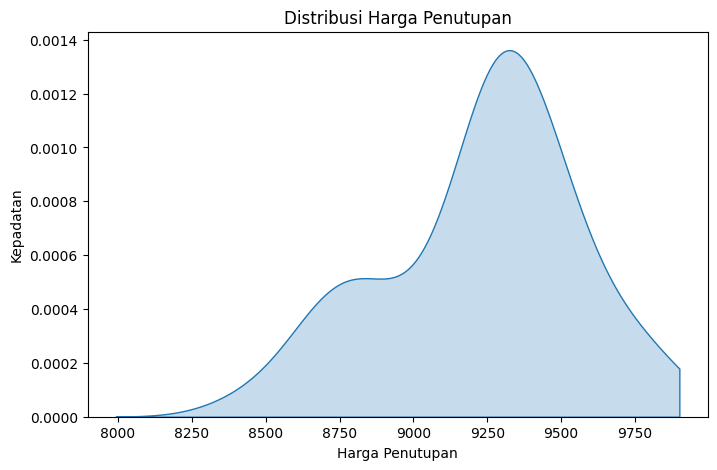

In [110]:
# sns.kdeplot(ihsg['Close'], shade=True)

# Asumsi 'data_positif' sudah tidak mengandung nilai negatif
data_positif = df[df['Close'] > 0]

# Menggunakan clip untuk membatasi rentang KDE
plt.figure(figsize=(8, 5))
sns.kdeplot(data_positif['Close'], shade=True, clip=(0, max(data_positif['Close'])))
plt.xlabel('Harga Penutupan')  # Label sumbu x dalam bahasa Indonesia
plt.ylabel('Kepadatan')        # Label sumbu y dalam bahasa Indonesia
plt.title('Distribusi Harga Penutupan')  # Judul plot dalam bahasa Indonesia
plt.show()

Dari grafik distribusi kepadatan harga penutupan, terlihat bahwa harga penutupan memiliki distribusi unimodal dengan puncak sekitar **9,250–9,300**. Distribusi ini cenderung miring ke kanan (right-skewed), yang menunjukkan bahwa sebagian besar harga penutupan berkumpul di sekitar nilai tersebut, tetapi terdapat beberapa harga yang lebih tinggi yang menyebabkan ekor distribusi lebih panjang di sisi kanan. Hal ini mengindikasikan bahwa ada beberapa periode di mana harga penutupan mengalami kenaikan signifikan dibandingkan dengan mayoritas nilai lainnya.

In [111]:
# Menghitung return harian berdasarkan harga penutupan yang disesuaikan ('Terakhir') dan harga pembukaan ('Pembukaan')
df['Return'] = (df['Close'] - df['Open']) / df['Open']
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2022-10-03,8975.0,9000.0,8825.0,8900.0,8900.0,14174700,-0.008357
2022-10-04,8925.0,9000.0,8850.0,8850.0,8850.0,29190100,-0.008403
2022-10-05,8900.0,8975.0,8850.0,8850.0,8850.0,32491500,-0.005618
2022-10-06,8900.0,8950.0,8800.0,8900.0,8900.0,11984500,0.000000
2022-10-07,8850.0,8875.0,8750.0,8775.0,8775.0,18278000,-0.008475


In [112]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01,59.000000
mean,9238.983051,9333.898305,9128.813559,9233.898305,9233.898305,2.650958e+07,-0.000418
std,327.716472,323.429985,310.096396,325.919214,325.919214,1.489949e+07,0.016014
min,8425.000000,8625.000000,8350.000000,8425.000000,8425.000000,1.198450e+07,-0.045326
25%,9012.500000,9150.000000,8925.000000,9050.000000,9050.000000,1.720805e+07,-0.007035
50%,9275.000000,9350.000000,9225.000000,9275.000000,9275.000000,2.317540e+07,0.000000
75%,9475.000000,9537.500000,9350.000000,9425.000000,9425.000000,3.021185e+07,0.003970
max,9900.000000,9950.000000,9675.000000,9900.000000,9900.000000,1.143845e+08,0.053191


Dari statistik deskriptif data harga saham, terlihat bahwa rata-rata harga penutupan saham adalah **9.233,90** dengan standar deviasi **325,92**, menunjukkan adanya fluktuasi harga yang cukup signifikan. Harga saham terendah dalam periode ini adalah **8.425**, sedangkan harga tertinggi mencapai **9.900**. Kuartil pertama (Q1) berada di **9.050**, median di **9.275**, dan kuartil ketiga (Q3) di **9.425**, yang menunjukkan distribusi harga yang relatif simetris dengan sedikit kecenderungan ke arah nilai yang lebih tinggi. Volume perdagangan rata-rata sebesar **26,51 juta**, dengan volume maksimum mencapai **114,38 juta**, yang menandakan adanya periode dengan aktivitas perdagangan yang jauh lebih tinggi dibandingkan hari biasa. Rata-rata return harian bernilai negatif **-0,000418**, menunjukkan sedikit kecenderungan penurunan harga, meskipun return maksimum mencapai **5,32%** dan return minimum **-4,53%**, yang mencerminkan volatilitas yang cukup tinggi dalam pergerakan harga saham.

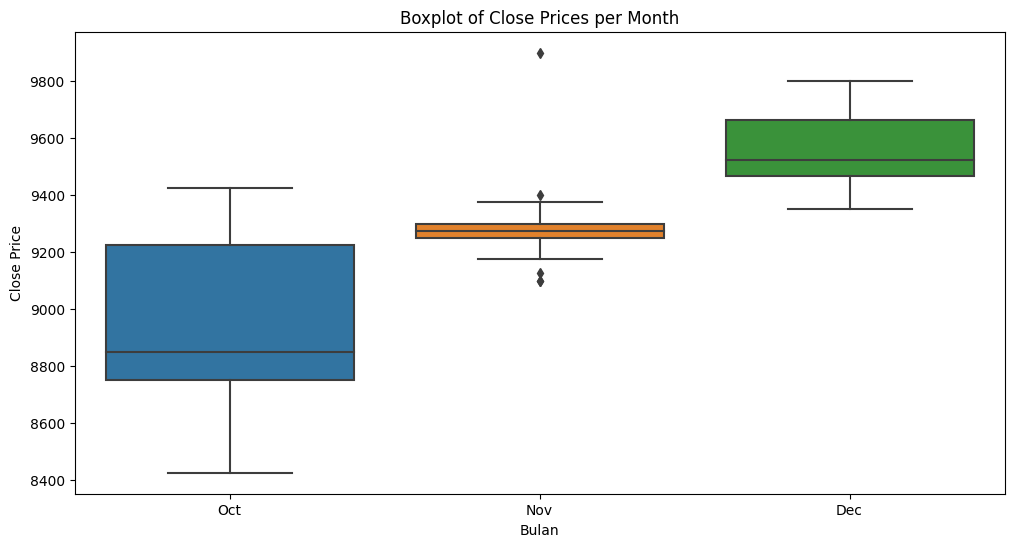

In [113]:
# 1. Pastikan kolom 'Date' dalam format datetime
df.index = pd.to_datetime(df.index)  

# 2. Ekstrak bulan dari indeks 'Date'
df['month'] = df.index.month  

# 3. Buat boxplot Close per bulan
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='Close', data=df)
plt.title('Boxplot of Close Prices per Month')
plt.xlabel('Bulan')
plt.ylabel('Close Price')
plt.xticks(ticks=range(3), labels=['Oct', 'Nov', 'Dec'])
plt.show()

Boxplot harga penutupan saham per bulan menunjukkan perbedaan distribusi harga di bulan Oktober, November, dan Desember. Pada bulan Oktober, harga penutupan memiliki rentang yang cukup lebar dengan median lebih rendah dibandingkan bulan lainnya, menunjukkan volatilitas yang lebih tinggi. November memiliki distribusi harga yang lebih sempit dengan median lebih tinggi dari Oktober tetapi lebih rendah dari Desember, serta beberapa outlier yang menunjukkan adanya fluktuasi harga ekstrem. Sementara itu, Desember menunjukkan harga penutupan yang lebih tinggi secara keseluruhan dengan median yang lebih tinggi dibandingkan dua bulan sebelumnya, serta distribusi yang lebih stabil dengan rentang interkuartil yang lebih kecil dibandingkan Oktober. Secara keseluruhan, tren harga saham tampak meningkat dari Oktober ke Desember, dengan volatilitas yang cenderung menurun di akhir periode.

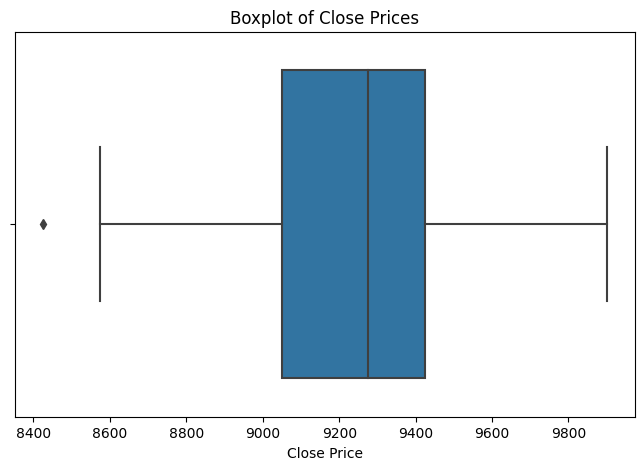

In [114]:
# Membuat boxplot untuk kolom 'Close'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Close'])
plt.title('Boxplot of Close Prices')
plt.xlabel('Close Price')
plt.show()

Boxplot harga penutupan menunjukkan distribusi data harga saham dengan rentang interkuartil yang cukup besar, mengindikasikan adanya variabilitas harga yang signifikan. Median harga penutupan berada di sekitar 9300–9400, menunjukkan bahwa setengah dari data berada di atas dan setengahnya di bawah nilai tersebut. Whisker yang panjang menunjukkan bahwa harga saham mengalami fluktuasi yang cukup besar, dengan satu outlier di sisi bawah sekitar 8425, yang menunjukkan adanya harga penutupan yang jauh lebih rendah dibandingkan mayoritas data lainnya. Secara keseluruhan, distribusi harga saham cenderung simetris dengan beberapa variasi yang cukup besar dalam periode yang dianalisis.

In [115]:
# Menghitung IQR (Interquartile Range)
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outlier
outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]

# Menampilkan jumlah dan contoh outlier jika ada
if not outliers.empty:
    print(f"Ditemukan {len(outliers)} outlier dalam data harga penutupan BNI.")
    print(outliers.head())  # Menampilkan beberapa contoh outlier
else:
    print("Tidak ada outlier dalam data harga penutupan BNI.")

Ditemukan 1 outlier dalam data harga penutupan BNI.
              Open    High     Low   Close  Adj Close    Volume    Return   
Date                                                                        
2022-10-14  8825.0  8850.0  8425.0  8425.0     8425.0  24934700 -0.045326  \

            month  
Date               
2022-10-14     10  


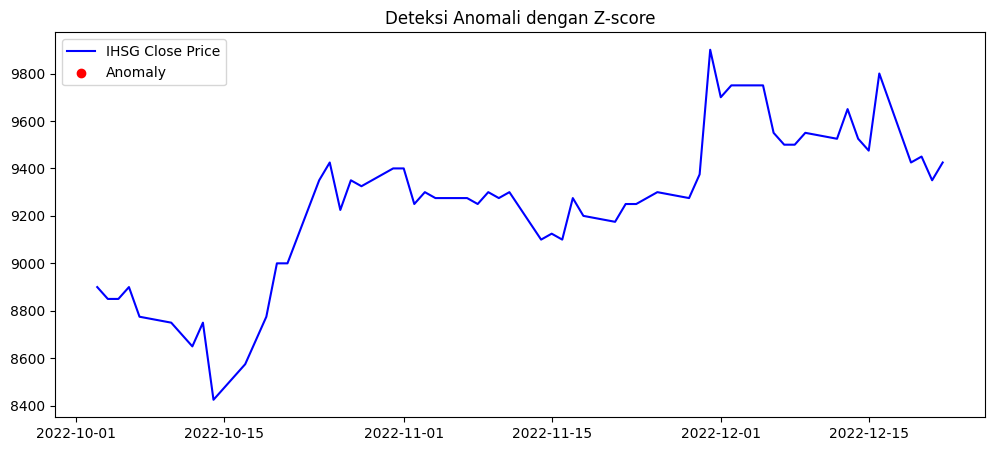

In [116]:
# DENGAN Z-SCORE
# Menghitung Z-score
df['Z-score'] = zscore(df['Close'])

# Menentukan batas anomali (|Z| > 3 dianggap anomali)
df['Anomaly_Z'] = df['Z-score'].apply(lambda x: 1 if abs(x) > 3 else 0)

# Visualisasi hasil deteksi anomali
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='IHSG Close Price', color='blue')
plt.scatter(df[df['Anomaly_Z'] == 1].index, df[df['Anomaly_Z'] == 1]['Close'], color='red', label='Anomaly', marker='o')
plt.legend()
plt.title("Deteksi Anomali dengan Z-score")
plt.show()

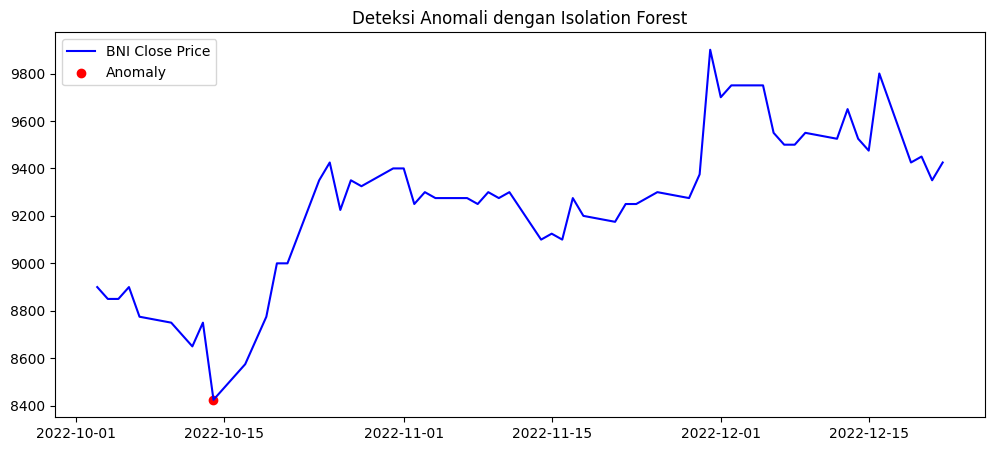

In [117]:
# DENGAN ISOLATION FOREST

# Inisialisasi model Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['Anomaly_IF'] = iso_forest.fit_predict(df[['Close']])

# Visualisasi hasil deteksi anomali
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='BNI Close Price', color='blue')
plt.scatter(df[df['Anomaly_IF'] == -1].index, df[df['Anomaly_IF'] == -1]['Close'], color='red', label='Anomaly', marker='o')
plt.legend()
plt.title("Deteksi Anomali dengan Isolation Forest")
plt.show()


Grafik menunjukkan deteksi anomali pada harga penutupan saham BNI menggunakan metode **Isolation Forest**. Garis biru merepresentasikan pergerakan harga saham dari **Oktober hingga Desember 2022**, sementara titik merah menandai adanya **anomali** yang terdeteksi. Terlihat bahwa hanya ada satu titik anomali yang muncul sekitar pertengahan Oktober 2022, ketika harga saham mengalami penurunan tajam. Hal ini mengindikasikan bahwa pada tanggal tersebut terjadi pergerakan harga yang tidak biasa dibandingkan dengan pola historis lainnya. Isolation Forest mendeteksi anomali dengan cara mengisolasi sampel yang berbeda signifikan dari pola umum, sehingga titik anomali ini mungkin disebabkan oleh faktor eksternal seperti berita pasar, sentimen investor, atau kejadian ekonomi yang memengaruhi harga saham secara drastis.

In [118]:
ratio = df['Close'].max() / df['Close'].min()
print("Rasio Max/Min:", ratio)

Rasio Max/Min: 1.175074183976261


Ketika melakukan dekoposisi deret, perlu diperhatikan bahwa terdapat 2 jenis model untuk dekomposisi, yaitu model Aditif dan multiplikatif.

- Model aditif digunakan jika ragam deret relatif konstan atau kecil
- Model multiplikatif digunakan jika ragam deret besar

Salah satu metode praktis adalah menghitung rasio antara nilai maksimum dan minimum harga.

- Jika rasio cukup kecil (misal, < 2 atau 3) → Model Aditif.
- Jika rasio besar (misal, > 3) → Model Multiplikatif.

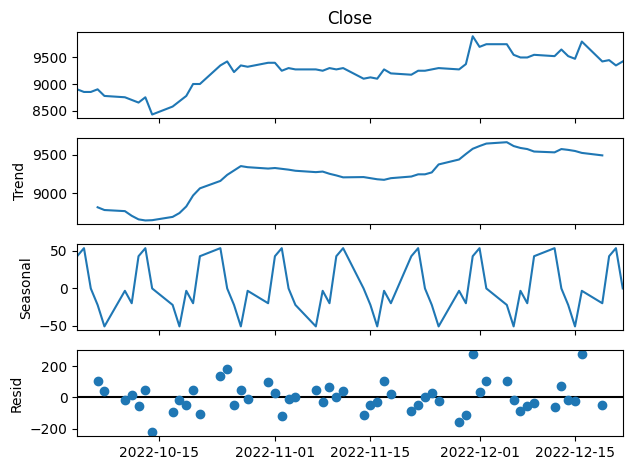

In [119]:
series = df.Close
result = seasonal_decompose(series, model='additive',period=7) # The frequncy is dayly
figure = result.plot()

- Harga saham mengalami tren naik dalam periode yang dianalisis, dengan beberapa fluktuasi.
- Ada pola musiman yang berulang, yang mungkin dapat digunakan untuk prediksi atau strategi trading.
- Variasi acak (residual) tidak terlalu besar, yang menunjukkan bahwa tren dan musiman cukup menjelaskan pola data.
- Peningkatan harga di awal Desember 2022 bisa menjadi titik perhatian, apakah disebabkan oleh faktor fundamental atau spekulasi pasar.

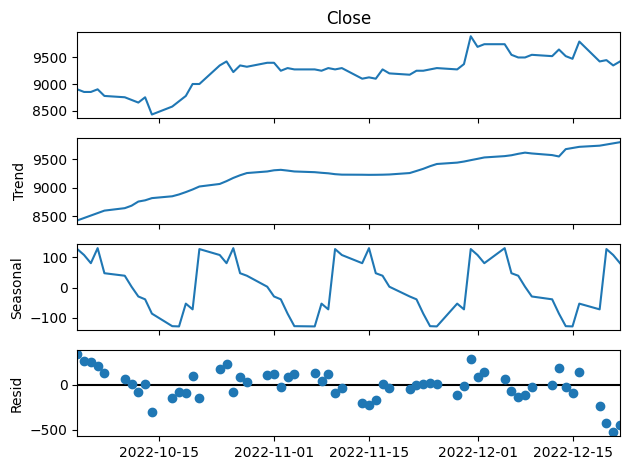

In [120]:
# Jika tetap ingin menggunakan periode 14, Anda bisa mencoba extrapolate_trend untuk mengisi nilai tren yang kurang:
result = seasonal_decompose(df['Close'], model='additive', period=14, extrapolate_trend='freq')
result.plot()
plt.show()

Grafik dekomposisi deret waktu untuk periode 14 hari ini menunjukkan bahwa harga penutupan (**Close**) mengalami tren kenaikan secara bertahap dengan sedikit fluktuasi, terutama pada awal Desember yang mengalami lonjakan tajam sebelum stabil di level tinggi. Komponen **trend** memperlihatkan pola peningkatan harga yang cukup konsisten, sementara **musiman (seasonal)** menunjukkan adanya pola fluktuatif yang berulang, mencerminkan efek siklus dalam periode tersebut. Komponen **residual (noise)** masih memiliki beberapa titik ekstrem, terutama di akhir periode, yang bisa mengindikasikan adanya volatilitas pasar atau faktor eksternal yang memengaruhi harga saham. Hal ini menunjukkan bahwa dalam jangka pendek, harga saham cenderung dipengaruhi oleh tren naik dengan pola musiman yang cukup kuat dan beberapa anomali kecil.

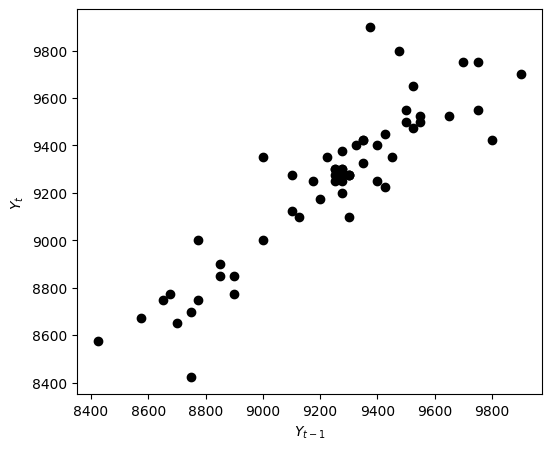

In [121]:
# menampilkan scatterplot antara Yt dan Yt-1
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.Close, lag=1, c='k')
plt.xlabel(r'$Y_{t-1}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Plot ini merupakan **plot autokorelasi lag-1**, yang menunjukkan hubungan antara nilai data saat ini (\( Y_t \)) dengan nilai sebelumnya (\( Y_{t-1} \)). Dari pola titik-titik yang membentuk distribusi linear yang cukup kuat, terlihat bahwa terdapat korelasi positif yang tinggi antara \( Y_t \) dan \( Y_{t-1} \). Hal ini mengindikasikan bahwa nilai data pada suatu waktu sangat dipengaruhi oleh nilai sebelumnya, sehingga terdapat pola keteraturan dalam data. Jika korelasi sangat tinggi, ini bisa menjadi indikasi bahwa data memiliki tren atau mungkin mengandung komponen autoregresif. Jika digunakan dalam analisis deret waktu, pola ini dapat menunjukkan bahwa model AR (Autoregressive) mungkin cocok untuk memprediksi data.

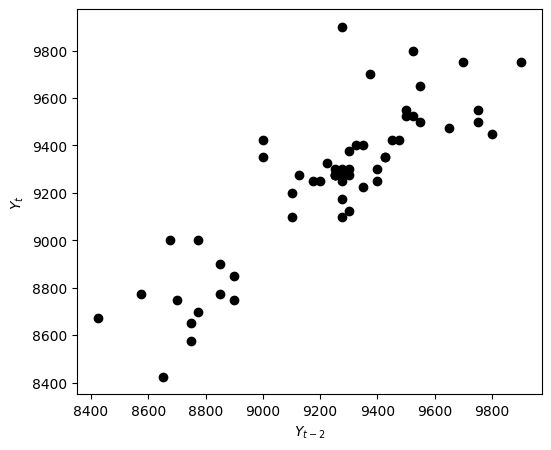

In [145]:
# menampilkan scatterplot antara Yt dan Yt-2
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.Close, lag=2, c='k')
plt.xlabel(r'$Y_{t-2}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

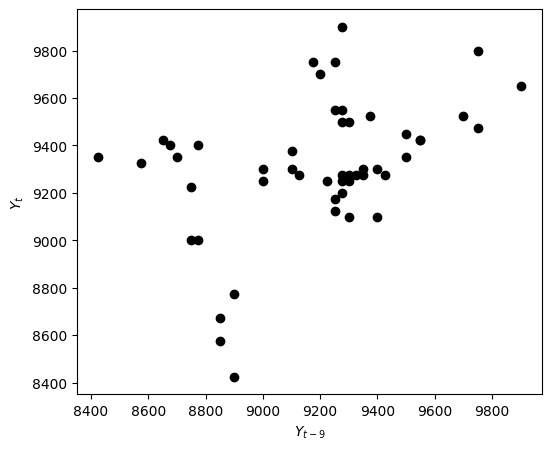

In [123]:
# menampilkan scatterplot antara Yt dan Yt-9
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.Close, lag=9, c='k')
plt.xlabel(r'$Y_{t-9}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Plot baru terlihat acak pada lag ke-9 yang menandakan bahwa sudah tidak terjadi autokorelasi

## Uji ACF Stationary Test / ADF (Augmented Dickey-Fuller) Test

Deret waktu dikatakan stasioner jika karakteristik statistiknya, seperti rata-rata, varians, dan autokorelasi, tetap konstan sepanjang waktu.  

**Stasioneritas kuat** mengacu pada proses stokastik di mana distribusi probabilitasnya tidak berubah meskipun mengalami pergeseran waktu, sehingga parameter seperti rata-rata dan varians tetap stabil. Sementara itu, **stasioneritas lemah** hanya mensyaratkan bahwa rata-rata, varians, dan autokorelasi tidak berubah seiring waktu.  

Stasioneritas sangat penting dalam analisis deret waktu karena data yang tidak stasioner memiliki ketergantungan waktu yang tinggi, sehingga mempersulit pemodelan. Salah satu metode untuk mengubah data non-stasioner menjadi stasioner adalah dengan melakukan diferensiasi menggunakan metode `diff()`.  

Sebelum menganalisis deret waktu, kita perlu menguji apakah data bersifat stasioner atau tidak. Salah satu uji statistik yang umum digunakan adalah **Uji Dickey-Fuller**, yang menentukan apakah ada akar unit dalam data. Hipotesis nol (H0) menyatakan bahwa deret memiliki akar unit (tidak stasioner), sedangkan hipotesis alternatif (H1) menyatakan bahwa deret tidak memiliki akar unit (stasioner). Jika hipotesis nol tidak dapat ditolak, maka deret waktu tersebut kemungkinan besar tidak stasioner. Jika rata-rata dan varians tetap konstan sepanjang waktu, maka deret waktu tersebut bersifat stasioner.

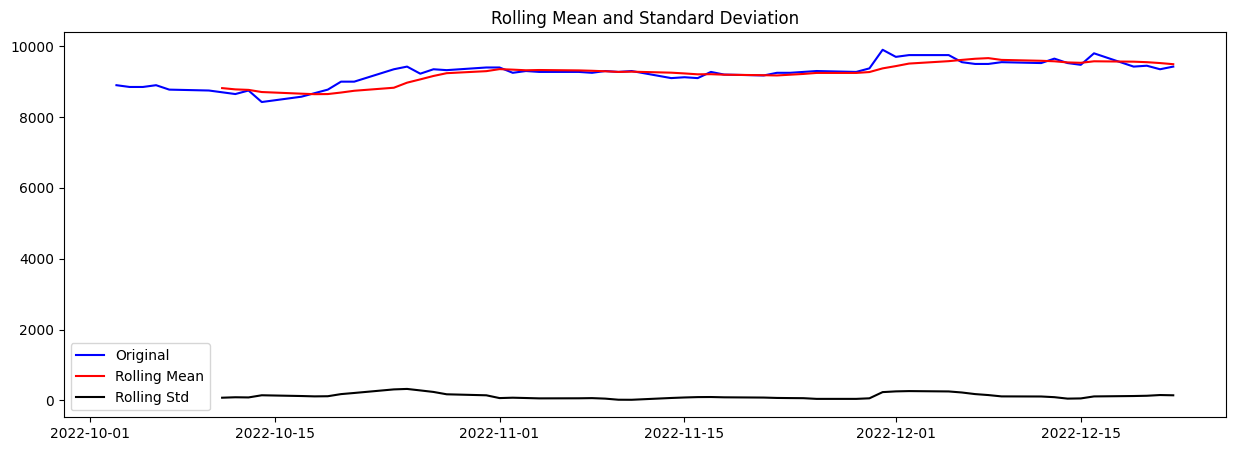

Results of dickey fuller test
Test Statistics                -1.512232
p-value                         0.527452
No. of lags used                1.000000
Number of observations used    57.000000
dtype: float64


In [124]:
#Test for staionarity
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    print(output)

test_stationarity(df['Close'])

Grafik menunjukkan pergerakan harga saham BNI beserta **rolling mean** (rata-rata bergerak) dan **rolling standard deviation** (deviasi standar bergerak) untuk mengamati kestabilan data dalam periode waktu tertentu. Rolling mean (garis merah) mengikuti tren data asli (garis biru), menunjukkan adanya pola yang cenderung meningkat dengan sedikit fluktuasi. Hasil **Uji Augmented Dickey-Fuller (ADF)** menunjukkan bahwa **statistik uji sebesar -1.512** dengan **p-value 0.527**, yang lebih besar dari tingkat signifikansi umum (0.05). Hal ini mengindikasikan bahwa data **tidak stasioner**, sehingga perlu dilakukan transformasi seperti differencing atau detrending untuk membuatnya stasioner sebelum dapat digunakan dalam pemodelan time series seperti ARIMA atau SARIMA.

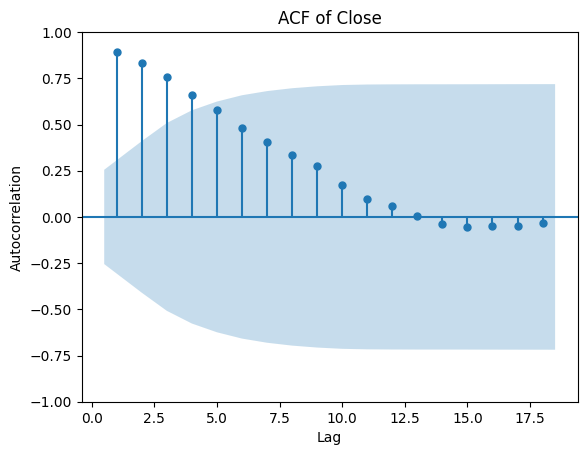

In [125]:
# Assuming 'rr' is your DataFrame and 'berat' is the column of interest
plot_acf(np.array(df.Close), zero=False)
plt.title('ACF of Close')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

Plot ACF dari data **Close** menunjukkan bahwa nilai autokorelasi masih cukup tinggi pada beberapa lag pertama dan menurun secara perlahan, yang mengindikasikan adanya tren dalam data. Tidak adanya cutoff yang jelas dalam ACF, melainkan pola **eksponensial decay (peluruhan eksponensial)**, merupakan karakteristik dari proses **Autoregressive (AR)**. Hal ini menunjukkan bahwa model **ARIMA dengan komponen AR(p) lebih dominan** dibandingkan MA(q). Untuk memastikan model yang sesuai, perlu dilakukan analisis lebih lanjut dengan melihat PACF dan uji stasioneritas data. Jika data masih non-stasioner, differencing mungkin diperlukan sebelum menentukan model yang optimal.

### Tahap Differencing

In [127]:
df['Stocks First Difference']=df['Close']-df['Close'].shift(1)

In [128]:
adft = adfuller(df['Stocks First Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics               -9.806815e+00
p-value                        5.796618e-17
No. of lags used               0.000000e+00
Number of observations used    5.700000e+01
dtype: float64


Hasil **Uji Augmented Dickey-Fuller (ADF)** menunjukkan bahwa statistik uji sebesar **-9.807** dengan **p-value 5.80 × 10⁻¹⁷**, yang jauh lebih kecil dari tingkat signifikansi umum (0.05). Ini berarti kita dapat **menolak hipotesis nol (H₀)** yang menyatakan bahwa data memiliki unit root atau tidak stasioner. Dengan demikian, data ini **sudah stasioner**, yang berarti fluktuasi rata-rata dan variansnya stabil sepanjang waktu. Data yang stasioner seperti ini cocok untuk digunakan dalam pemodelan time series seperti ARIMA tanpa perlu transformasi tambahan seperti differencing.

Text(0.5, 1.0, 'Plot Close Setelah Differencing 1')

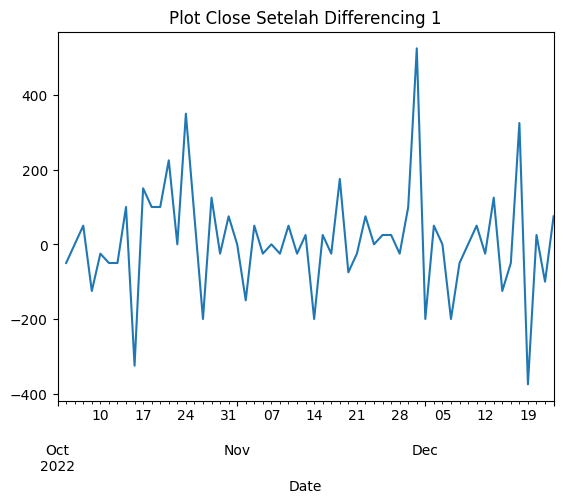

In [129]:
df['Stocks First Difference'].plot()
plt.title('Plot Close Setelah Differencing 1')

Grafik tersebut menunjukkan **plot harga penutupan saham setelah dilakukan differencing pertama** (d = 1). Differencing ini dilakukan untuk menghilangkan tren dan membuat data menjadi stasioner. Dari grafik, terlihat bahwa fluktuasi nilai kini berosilasi di sekitar nol, yang menandakan bahwa tren jangka panjang telah dihilangkan. Meskipun masih terdapat volatilitas tinggi dengan lonjakan dan penurunan tajam, pola ini lebih cocok untuk diterapkan dalam model time series seperti **ARIMA**, yang memerlukan data stasioner untuk menghasilkan prediksi yang lebih akurat.

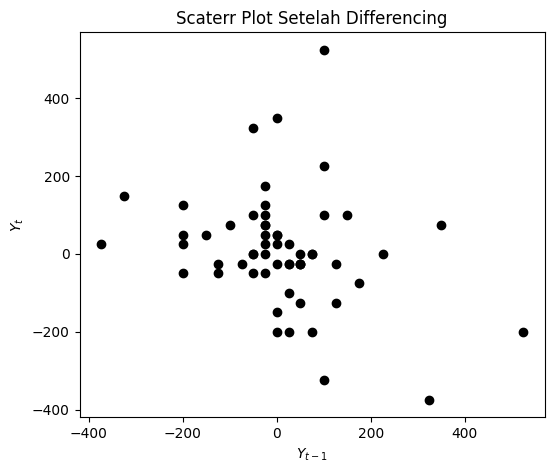

In [148]:
# menampilkan scatterplot antara Yt dan Yt-1
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df['Stocks First Difference'], lag=1, c='k')
plt.xlabel(r'$Y_{t-1}$'),plt.ylabel(r'$Y_{t}$')
plt.title('Scaterr Plot Setelah Differencing')
plt.show()

Scatter plot setelah differencing ini menunjukkan bahwa hubungan antara \( Y_t \) dan \( Y_{t-1} \) menjadi lebih acak dibandingkan sebelum differencing. Hal ini mengindikasikan bahwa tren atau pola autokorelasi yang sebelumnya ada telah berkurang atau hilang, yang merupakan indikasi bahwa data sudah lebih mendekati stasioner. Jika titik-titik tersebar secara acak tanpa pola yang jelas, maka differencing berhasil dalam menghilangkan tren dan menjadikan data lebih sesuai untuk pemodelan time series seperti ARIMA. Namun, jika masih terlihat pola tertentu, mungkin diperlukan differencing tambahan atau pendekatan lain untuk mencapai stasioneritas penuh.

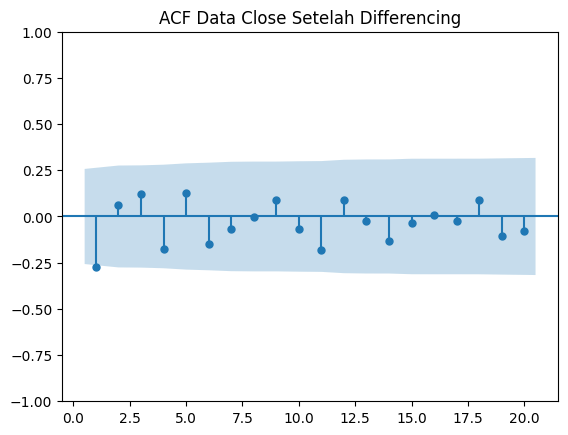

In [130]:
plot_acf(df['Stocks First Difference'].dropna(), lags=20, zero=False)  # Menampilkan ACF hingga lag 20
plt.title('ACF Data Close Setelah Differencing')
plt.show()

Grafik Autocorrelation Function (ACF) menunjukkan bagaimana data setelah differencing berkorelasi dengan lag sebelumnya. Dari hasil plot, sebagian besar nilai ACF berada dalam batas konfidensi, yang menunjukkan bahwa data sudah cukup bersifat white noise dan tidak memiliki pola autokorelasi yang signifikan. Namun, jika ada lag yang masih signifikan, hal ini menunjukkan adanya keterkaitan data dengan beberapa periode sebelumnya, yang bisa dipertimbangkan dalam pemodelan ARIMA.

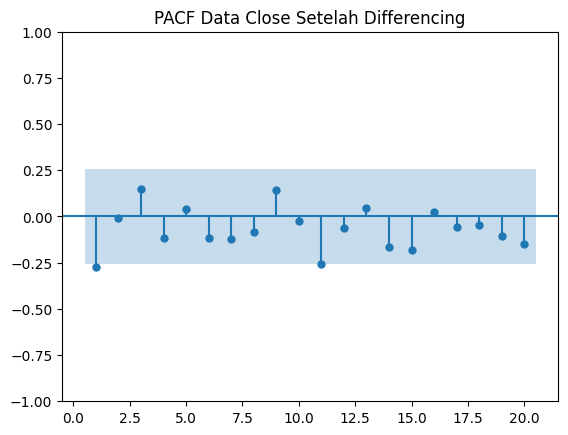

In [131]:
plot_pacf(df['Stocks First Difference'].dropna(), lags=20, zero=False) # Menampilkan PACF hingga lag 20
plt.title('PACF Data Close Setelah Differencing')
plt.show()

Grafik Partial Autocorrelation Function (PACF) memperlihatkan bahwa hanya lag awal yang signifikan, sedangkan lag berikutnya cenderung berada dalam batas konfidensi. Ini mengindikasikan bahwa model autoregresif (AR) dengan orde kecil mungkin cukup untuk menangkap hubungan dalam data setelah differencing. Berdasarkan plot PACF ini, kita bisa mempertimbangkan penggunaan model ARIMA dengan parameter AR yang rendah.

Berdasarkan analisis plot **ACF** dan **PACF** setelah differencing, kita bisa menentukan model ARIMA yang sesuai:  

1. **ACF (Autocorrelation Function)**:  
   - ACF menunjukkan bahwa setelah lag awal, nilai korelasi cepat menurun dan sebagian besar lag tidak signifikan.  
   - Ini mengindikasikan bahwa data tidak memiliki pola MA (Moving Average) yang kuat.  

2. **PACF (Partial Autocorrelation Function)**:  
   - PACF menunjukkan cutoff yang jelas pada lag awal, yang berarti ada efek autoregresif (AR).  
   - Hanya beberapa lag pertama yang signifikan, mengindikasikan bahwa model AR mungkin berorde rendah.  

### Rekomendasi Model ARIMA:  
- Dari plot **PACF** yang menunjukkan cutoff pada lag awal, model ini kemungkinan memiliki **komponen AR (p) yang rendah**.  
- Dari **ACF** yang tidak menunjukkan pola yang jelas, kemungkinan **komponen MA (q) kecil atau bahkan nol**.  
- Karena sudah dilakukan differencing sekali, maka **d = 1**.  

**Model yang direkomendasikan**:  
- Jika PACF cutoff pada **lag 1**, gunakan **ARIMA(1,1,0)** → Model dengan 1 lag autoregressive.  
- Jika PACF cutoff pada **lag 2**, gunakan **ARIMA(2,1,0)** → Model dengan 2 lag autoregressive.  
- Jika masih ada sedikit pola pada ACF, bisa dicoba **ARIMA(1,1,1)** atau **ARIMA(2,1,1)**.  

Untuk memastikan model terbaik, sebaiknya dilakukan **uji Akaike Information Criterion (AIC)** atau **Bayesian Information Criterion (BIC)** serta pengecekan residual model setelah pemodelan dilakukan.

In [133]:
# Definisikan rentang p, d, q
p = range(0, 4)  # Coba 0 sampai 3
d = range(1, 2)  # Coba 0 atau 1 (karena sudah diferensiasi)
q = range(0, 4)  # Coba 0 sampai 3

# Buat kombinasi grid search
pdq = list(itertools.product(p, d, q))

# Simpan hasil AIC
best_aic = float("inf")
best_pdq = None
results = []

# Looping mencari kombinasi terbaik
for param in pdq:
    try:
        model = ARIMA(df['Stocks First Difference'].dropna(), order=param)
        model_fit = model.fit()
        aic = model_fit.aic
        results.append((param, aic))
        if aic < best_aic:
            best_aic = aic
            best_pdq = param
    except:
        continue

# Konversi ke DataFrame
results_df = pd.DataFrame(results, columns=["(p,d,q)", "AIC"]).sort_values(by="AIC")

# Menampilkan hasil terbaik
print(f"Best ARIMA Order: {best_pdq} with AIC: {best_aic}")
print(results_df.head())  # Menampilkan 5 kombinasi terbaik


Best ARIMA Order: (1, 1, 1) with AIC: 735.6190332359304
      (p,d,q)         AIC
5   (1, 1, 1)  735.619033
2   (0, 1, 2)  736.098185
3   (0, 1, 3)  736.999055
10  (2, 1, 2)  737.130683
1   (0, 1, 1)  737.501275


Model ARIMA(1,1,1) memberikan AIC terendah

In [135]:
# Membuat model ARIMA(1, 1, 0)
model = ARIMA(df['Stocks First Difference'].dropna(), order=(1, 1, 0))
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     Stocks First Difference   No. Observations:                   58
Model:                      ARIMA(1, 1, 0)   Log Likelihood                -376.960
Date:                     Mon, 17 Feb 2025   AIC                            757.921
Time:                             01:03:54   BIC                            762.007
Sample:                         10-04-2022   HQIC                           759.509
                              - 12-22-2022                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6253      0.085     -7.371      0.000      -0.792      -0.459
sigma2      3.223e+04   4713.895      6.838      0.000     2.3e+04    4.15e+04
Ljung-Box (L

Maasih ada autokorelasi karena Prob(Q) = 0.02 < 0,05

In [136]:
# Membuat model ARIMA(1, 1, 1)
model = ARIMA(df['Stocks First Difference'].dropna(), order=(1, 1, 1))
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     Stocks First Difference   No. Observations:                   58
Model:                      ARIMA(1, 1, 1)   Log Likelihood                -364.810
Date:                     Mon, 17 Feb 2025   AIC                            735.619
Time:                             01:03:54   BIC                            741.748
Sample:                         10-04-2022   HQIC                           738.001
                              - 12-22-2022                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2568      0.148     -1.738      0.082      -0.546       0.033
ma.L1         -0.9988      4.580     -0.218      0.827      -9.975       7.978
sigma2      

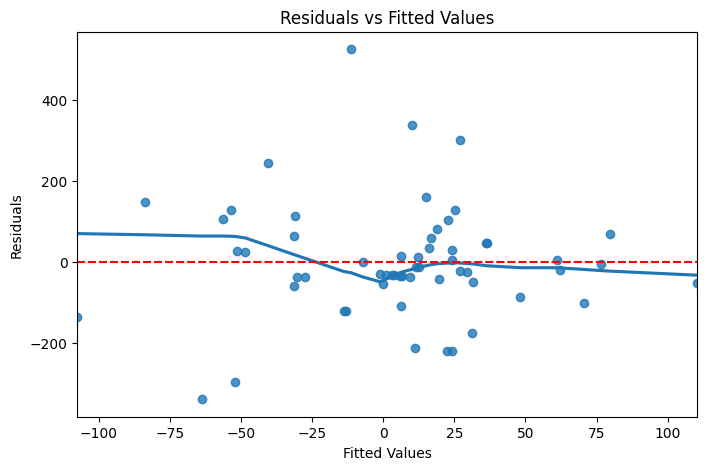

In [137]:
# Plot Residuals vs. Fitted Values
plt.figure(figsize=(8, 5))
sns.residplot(x=model_fit.fittedvalues, y=model_fit.resid, lowess=True)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


Grafik **Residuals vs Fitted Values** menunjukkan adanya pola non-acak dalam residual, yang mengindikasikan kemungkinan **heteroskedastisitas** atau hubungan non-linear yang tidak sepenuhnya ditangkap oleh model. Beberapa residual ekstrem menunjukkan adanya **outlier**, yang dapat mempengaruhi keakuratan model. Selain itu, garis tren biru yang sedikit melengkung menandakan bahwa asumsi regresi linier mungkin tidak sepenuhnya terpenuhi, sehingga diperlukan pendekatan lain seperti transformasi data atau model yang lebih kompleks untuk meningkatkan akurasi prediksi.

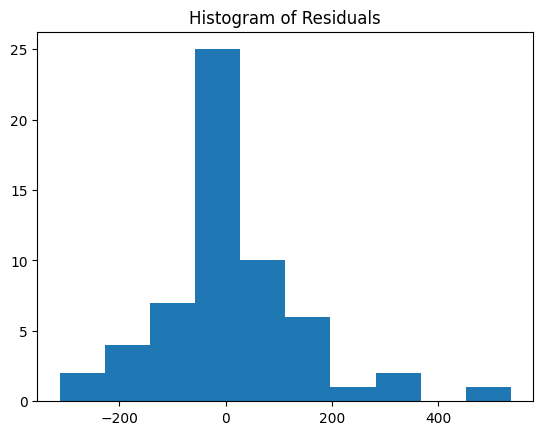

In [138]:
# Mendapatkan residual
residuals = model_fit.resid

# Plot histogram residual
plt.hist(residuals)
plt.title('Histogram of Residuals')
plt.show()

Histogram residual menunjukkan distribusi yang **tidak sepenuhnya simetris** dengan kecenderungan sedikit ke kanan, yang mengindikasikan bahwa residual mungkin tidak mengikuti distribusi normal secara sempurna. Terdapat beberapa nilai ekstrem di sisi kanan yang menunjukkan adanya **outlier positif**, yang dapat mempengaruhi performa model regresi. Selain itu, puncak distribusi berada di sekitar nol, yang merupakan indikasi bahwa sebagian besar residual kecil, tetapi penyebarannya masih cukup lebar. Jika asumsi normalitas residual diperlukan dalam model ini, mungkin perlu dilakukan uji statistik seperti **Kolmogorov-Smirnov atau Shapiro-Wilk** untuk memastikan normalitas, atau mempertimbangkan transformasi data untuk meningkatkan kesesuaian model.

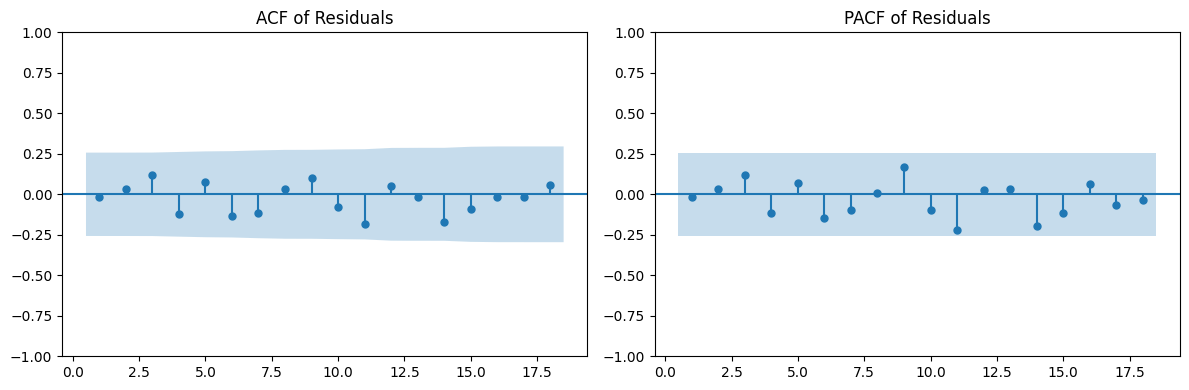

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot ACF residual
plot_acf(residuals, ax=axes[0], zero=False)
axes[0].set_title('ACF of Residuals')

# Plot PACF residual
plot_pacf(residuals, ax=axes[1], zero=False)
axes[1].set_title('PACF of Residuals')

plt.tight_layout()
plt.show()



Grafik **ACF (Autocorrelation Function) dan PACF (Partial Autocorrelation Function) dari residual** menunjukkan bahwa sebagian besar lag berada dalam batas kepercayaan (zona biru), yang mengindikasikan bahwa residual tidak memiliki autokorelasi yang signifikan. Ini berarti bahwa model yang digunakan sudah cukup baik dalam menangkap pola dalam data, dan tidak ada hubungan sistematis yang tersisa dalam residual. Namun, jika terdapat beberapa titik yang keluar dari batas kepercayaan, ini dapat menunjukkan adanya pola yang belum sepenuhnya dimodelkan, sehingga mungkin perlu mempertimbangkan model yang lebih kompleks atau menambahkan variabel tambahan untuk meningkatkan performa model.

In [140]:
# Membuat variabel eksogen dengan konstanta
exog = sm.add_constant(np.arange(len(model_fit.resid)))  # Menambahkan konstanta ke indeks waktu

# Melakukan uji Breusch-Pagan
bp_test = het_breuschpagan(model_fit.resid, exog)

# Menampilkan hasil
print('Breusch-Pagan test p-value:', bp_test[1])

Breusch-Pagan test p-value: 0.5808032285324337


Hasil uji Breusch-Pagan menunjukkan p-value sebesar **0.5808**, yang lebih besar dari **0.05**, sehingga tidak ada cukup bukti untuk menolak hipotesis nol (**H₀**), yaitu bahwa residual model tidak mengandung heteroskedastisitas. Ini menunjukkan bahwa variabilitas residual relatif konstan, sehingga asumsi homoskedastisitas terpenuhi. Dengan demikian, model ARIMA yang digunakan dapat dianggap valid dalam hal kestabilan varians residual, dan analisis atau prediksi selanjutnya dapat dilakukan tanpa perlu koreksi terhadap heteroskedastisitas.

In [98]:
#cek autokorelasi resiudal
lags = range(1, 21)  # Menguji lag 1 hingga 20
lb_test = acorr_ljungbox(residuals, lags=lags)
print(lb_test)

      lb_stat  lb_pvalue
1    0.015224   0.901801
2    0.091676   0.955197
3    1.010197   0.798785
4    1.920289   0.750417
5    2.325576   0.802503
6    3.574220   0.734070
7    4.475755   0.723635
8    4.545573   0.804857
9    5.240105   0.812895
10   5.676801   0.841647
11   8.208614   0.694504
12   8.400037   0.753140
13   8.416668   0.815436
14  10.699939   0.709431
15  11.375282   0.725566
16  11.405757   0.783775
17  11.438270   0.832895
18  11.736833   0.860522
19  13.278869   0.823994
20  14.186633   0.820908


In [150]:
# Membuat model ARIMA(2, 1, 1)
model = ARIMA(df['Stocks First Difference'].dropna(), order=(2, 1, 2))
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     Stocks First Difference   No. Observations:                   58
Model:                      ARIMA(2, 1, 2)   Log Likelihood                -363.565
Date:                     Mon, 17 Feb 2025   AIC                            737.131
Time:                             01:57:53   BIC                            747.346
Sample:                         10-04-2022   HQIC                           741.101
                              - 12-22-2022                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2032      0.202     -5.958      0.000      -1.599      -0.807
ar.L2         -0.3288      0.168     -1.954      0.051      -0.658       0.001
ma.L1       

Hasil estimasi model **SARIMAX(2,1,2)** menunjukkan bahwa koefisien AR(1) signifikan secara statistik dengan nilai **-1.2032 (p < 0.01)**, sementara AR(2) memiliki signifikansi marginal dengan p-value **0.051**. Koefisien MA(1) dan MA(2) tidak signifikan dengan p-value mendekati **1.000**, menunjukkan bahwa komponen moving average mungkin tidak terlalu berkontribusi dalam model. Nilai **AIC (737.131) dan BIC (747.346)** menunjukkan kompleksitas model, dan **uji Ljung-Box (Q=0.02, p=0.90)** mengindikasikan tidak adanya autokorelasi yang signifikan dalam residual. Namun, **uji Jarque-Bera (JB=12.18, p=0.00)** menunjukkan bahwa residual tidak berdistribusi normal karena adanya skewness (0.72) dan kurtosis tinggi (4.75), yang dapat memengaruhi kualitas inferensi model. Oleh karena itu, meskipun model cukup menangkap pola dalam data, distribusi residual yang tidak normal dan parameter MA yang tidak signifikan mengindikasikan bahwa model ini mungkin masih dapat ditingkatkan dengan pendekatan lain atau modifikasi parameter.